In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("nearest-earth-objects(1910-2024).csv")
data.head(7)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True


# Informations about our dataset

In [3]:
print(f"The deta contains:\n{data.shape[0]} row \n {data.shape[1]} feature")

The deta contains:
338199 row 
 9 feature


In [4]:
print("The missed values:")
data.isnull().sum()

The missed values:


neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


# Data cleaning

In [7]:
data["absolute_magnitude"].fillna(data["absolute_magnitude"].mean(), inplace= True)
data["estimated_diameter_min"].fillna(data["estimated_diameter_min"].mean(), inplace= True)
data["estimated_diameter_max"].fillna(data["estimated_diameter_max"].mean(), inplace= True)

In [8]:
data.duplicated().sum()

0

In [9]:
print("The missed values:")
data.isnull().sum()

The missed values:


neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# Our data became ready

# EDA

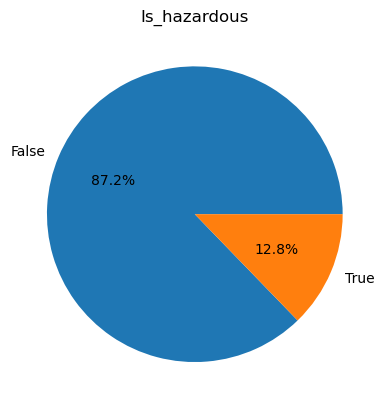

In [10]:
label=[]
label_count=[]
percentage = []

for i in range(2):
    label.append(data["is_hazardous"].value_counts().index[i])
    label_count.append(data["is_hazardous"].value_counts().values[i])
    percentage.append((data["is_hazardous"].value_counts().values[i]/data.shape[0])*100)
    

plt.pie(x=percentage, labels=label, autopct="%1.1f%%")
plt.title("Is_hazardous")
plt.show()

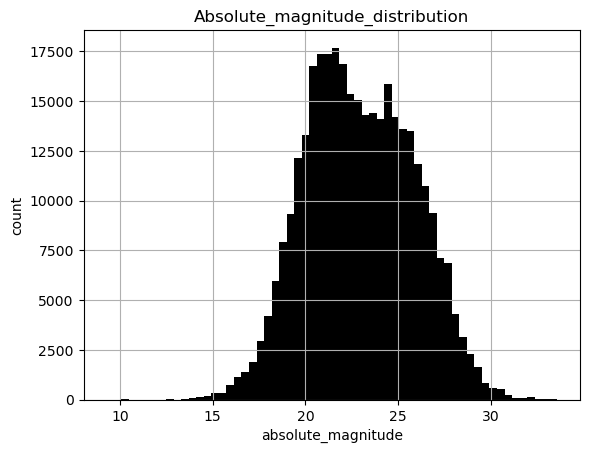

In [11]:
plt.hist(data["absolute_magnitude"],bins=60,color="k",)
plt.title("Absolute_magnitude_distribution")
plt.xlabel("absolute_magnitude")
plt.ylabel("count")
plt.grid()
plt.show()

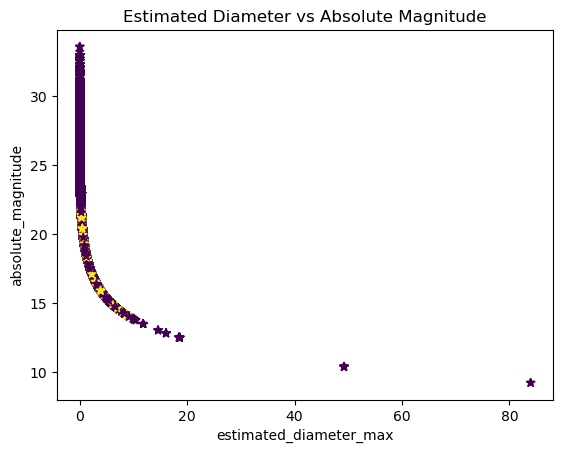

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(x=data["estimated_diameter_max"],y=data["absolute_magnitude"],marker="*" ,c=data["is_hazardous"])
plt.title("Estimated Diameter vs Absolute Magnitude")
plt.xlabel("estimated_diameter_max")
plt.ylabel("absolute_magnitude")
plt.figure(7)
plt.show()

# Data preprossing

In [13]:
data["is_hazardous_cat"] = data["is_hazardous"].astype("category")
data["is_hazardous"]= data["is_hazardous_cat"].cat.codes
data=data.drop(columns="is_hazardous_cat")
data["is_hazardous"].head(2)

0    0
1    1
Name: is_hazardous, dtype: int8

In [14]:
data["orbiting_body_cat"] = data["orbiting_body"].astype("category")
data["orbiting_body"]= data["orbiting_body_cat"].cat.codes
data=data.drop(columns="orbiting_body_cat")
data["orbiting_body"].head(2)

0    0
1    0
Name: orbiting_body, dtype: int8

In [15]:
data=data.drop(columns=["neo_id","name"])

In [16]:
data.head(7)

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,0,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,0,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,0,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,0,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,0,56036.519484,6.311863e+07,0
5,25.00,0.026580,0.059435,0,47477.649832,4.290521e+07,0
6,21.50,0.133216,0.297879,0,57853.295346,2.727908e+07,1


In [17]:
from sklearn.feature_selection import SelectKBest,chi2

In [18]:
y= data["is_hazardous"]
x= data.drop(columns="is_hazardous")
selector = SelectKBest(chi2, k=4)
selector.fit(x,y)
mask = selector.get_support(indices=True)
print(f"indices of columns_selected is :{mask}")
z=[]
for i in mask:
    z.append(f"{x.columns[i]}")
x = x[z]
x.head()

indices of columns_selected is :[0 2 4 5]


,absolute_magnitude,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.883161,71745.401048,5.814362e+07
1,18.50,1.185878,109949.757148,5.580105e+07
2,21.45,0.304818,24865.506798,6.720689e+07
3,20.63,0.444672,78890.076805,3.039644e+07
4,22.70,0.171412,56036.519484,6.311863e+07


In [19]:
from sklearn.model_selection import train_test_split

x_train,x_vaild_test,y_train,y_vaild_test = train_test_split(x,y,test_size=.2)

x_valid,x_test,y_valid,y_test = train_test_split(x_vaild_test,y_vaild_test,test_size=.1)

print(f" train size = {x_train.shape[0]}\n validation size = {x_valid.shape[0]}\n test size =  {x_test.shape[0]}")
y_valid.value_counts()

 train size = 270559
 validation size = 60876
 test size =  6764


0    53055
1     7821
Name: is_hazardous, dtype: int64

# ML models implemintation

In [20]:
#Function used for spliting the output (needed for drowing)
labels =["True","False"]
real_counts = []
predicted_counts = []
def fahd_fun(x):
    real_counts.clear()
    predicted_counts.clear()
    t = []
    fa = []
    for f in x:
        if f==0:
            fa.append(f)
        else:
            t.append(f)
            
    predicted_counts.append(len(t))
    predicted_counts.append(len(fa))
    t.clear()
    fa.clear()
    
    for r in y_valid:
        if r == 0:
            
            fa.append(r)
        else:
            t.append(r)
            
    real_counts.append(len(t))
    real_counts.append(len(fa))

In [21]:
def line_plot():
    global p
    plt.subplot(2,1,1)
    plt.scatter(x=labels,y=real_counts,color="#964B00",marker="*",s=70)
    plt.title("real_line")
    plt.xlabel("is_hazardous")
    plt.ylabel("count")
    plt.show()
    print(f"real_true is: {real_counts[0]}\nreal_false is: {real_counts[1]} ")
    
    
    plt.subplot(2,1,2)
    plt.scatter(x=labels,y=predicted_counts,color="k",marker="o",s=70)
    plt.title(f"Predictions_line for {p}")
    plt.xlabel("is_hazardous")
    plt.ylabel("count")
    plt.show()
    print(f"Prediction_true is: {predicted_counts[0]}\nPrediction_false is: {predicted_counts[1]} ")

In [22]:
def bar_plot():
    global p
    plt.subplot(2,1,1)
    plt.bar(labels,real_counts,color="#964B00")
    plt.title("real_bar")
    plt.xlabel("is_hazardous")
    plt.ylabel("count")
    plt.grid()
    plt.show()
    print(f"real_true is: {real_counts[0]}\nreal_false is: {real_counts[1]} ")
    
    
    plt.subplot(2,1,2)
    plt.bar(labels,predicted_counts,color="k")
    plt.title(f"Predictions_bar for {p}")
    plt.xlabel("is_hazardous")
    plt.ylabel("count")
    plt.grid()
    plt.show()
    print(f"Prediction_true is: {predicted_counts[0]}\nPrediction_false is: {predicted_counts[1]} ")

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,accuracy_score

# RandomForestClassifier

In [24]:
model2 = RandomForestClassifier(n_estimators=5,random_state=0,class_weight="balanced")
model2.fit(x_train,y_train)
predctions2 = model2.predict(x_valid)


In [25]:
repo2 = classification_report(predctions2,y_valid)
acc2 = accuracy_score(predctions2,y_valid)
p = "RandomForestClassifier"
print(f"the model {p} accuracy is : {acc2}")
print(f"the model {p} classification_report is : \n{repo2}")

the model RandomForestClassifier accuracy is : 0.904642223536369
the model RandomForestClassifier classification_report is : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     54496
           1       0.54      0.66      0.59      6380

    accuracy                           0.90     60876
   macro avg       0.75      0.80      0.77     60876
weighted avg       0.91      0.90      0.91     60876



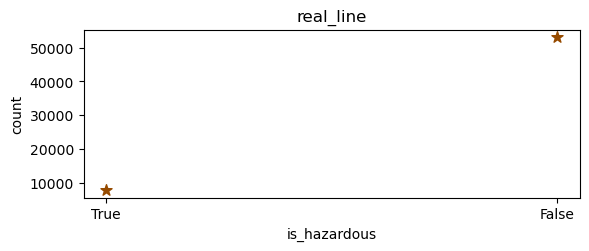

real_true is: 7821
real_false is: 53055 


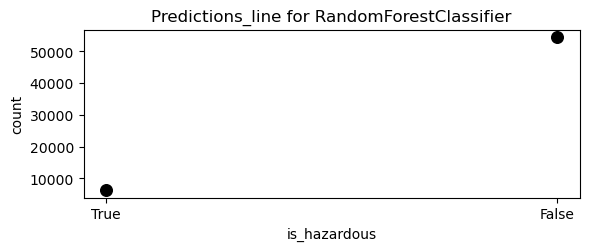

Prediction_true is: 6380
Prediction_false is: 54496 


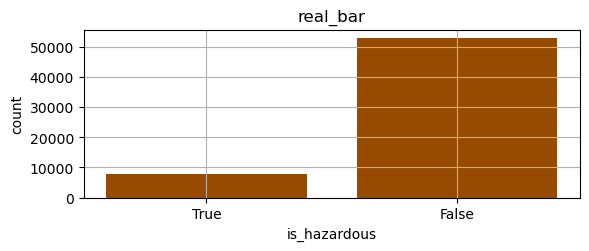

real_true is: 7821
real_false is: 53055 


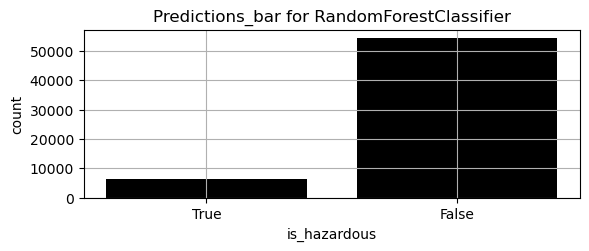

Prediction_true is: 6380
Prediction_false is: 54496 


In [26]:
fahd_fun(predctions2)
line_plot()
bar_plot()

# LogisticRegression

In [27]:
model = LogisticRegression(random_state=0,fit_intercept=True,multi_class="auto",solver="liblinear",class_weight="balanced")
model.fit(x_train,y_train)
predctions = model.predict(x_valid)

In [28]:
repo = classification_report(predctions,y_valid)
acc = accuracy_score(predctions,y_valid)
p = "LogisticRegression"
print(f"the model {p} accuracy is : {acc}")
print(f"the model {p} classification_report is : \n{repo}")

the model LogisticRegression accuracy is : 0.702822130231947
the model LogisticRegression classification_report is : 
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     41604
           1       0.58      0.23      0.33     19272

    accuracy                           0.70     60876
   macro avg       0.65      0.58      0.57     60876
weighted avg       0.68      0.70      0.66     60876



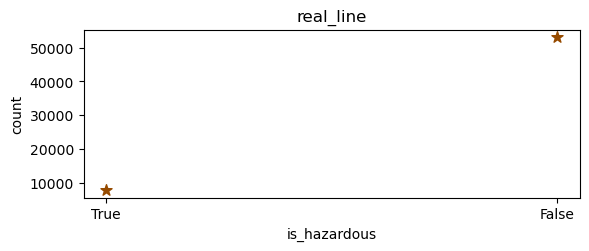

real_true is: 7821
real_false is: 53055 


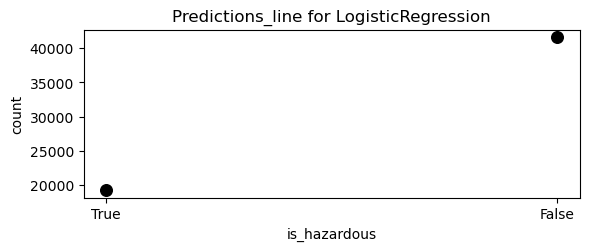

Prediction_true is: 19272
Prediction_false is: 41604 


In [29]:
fahd_fun(predctions)
line_plot()

# DecisionTreeClassifier

In [30]:
model3 = DecisionTreeClassifier(random_state=0,class_weight="balanced")
model3.fit(x_train,y_train)
predictions3 = model3.predict(x_valid)

In [31]:
repo3 = classification_report(predictions3,y_valid)
acc3 = accuracy_score(predictions3,y_valid)
p = "DecisionTreeClassifier"
print(f"the model {p} accuracy is : {acc3}")
print(f"the model {p} classification_report is : \n{repo3}")

the model DecisionTreeClassifier accuracy is : 0.8924370852224194
the model DecisionTreeClassifier classification_report is : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     53431
           1       0.56      0.59      0.57      7445

    accuracy                           0.89     60876
   macro avg       0.75      0.76      0.75     60876
weighted avg       0.89      0.89      0.89     60876



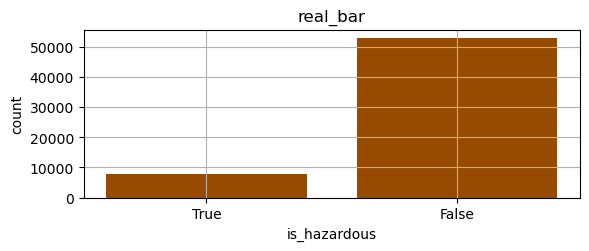

real_true is: 7821
real_false is: 53055 


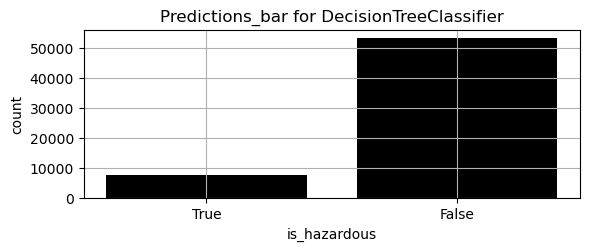

Prediction_true is: 7445
Prediction_false is: 53431 


In [32]:
fahd_fun(predictions3)

bar_plot()

# KNeighborsClassifier

In [39]:
model5 = KNeighborsClassifier(n_neighbors=1)
model5.fit(x_train,y_train)
pred = model5.predict(x_valid)

In [40]:
acc5 = accuracy_score(pred,y_valid)
repo5 = classification_report(pred,y_valid)
p ="KNeighborsClassifier"
print(f"the model {p} accuracy is : {acc5}")
print(f"the model {p} classification_report is : \n{repo5}")

the model KNeighborsClassifier accuracy is : 0.7996911755043038
the model KNeighborsClassifier classification_report is : 
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     52973
           1       0.23      0.22      0.22      7903

    accuracy                           0.80     60876
   macro avg       0.55      0.55      0.55     60876
weighted avg       0.80      0.80      0.80     60876



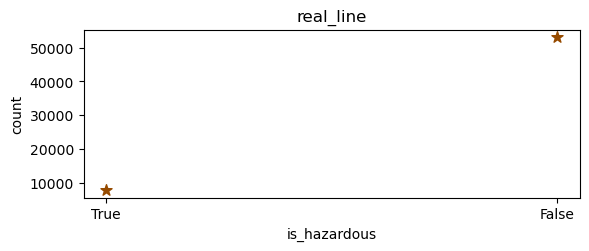

real_true is: 7821
real_false is: 53055 


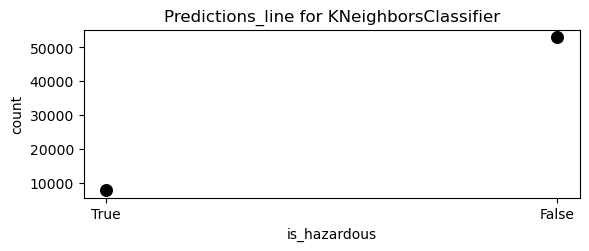

Prediction_true is: 7903
Prediction_false is: 52973 


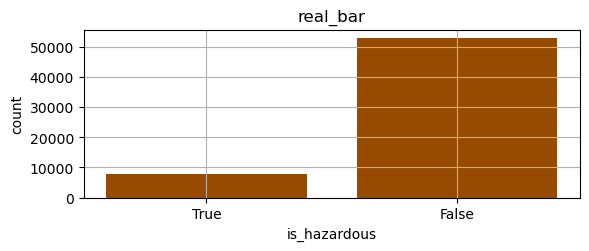

real_true is: 7821
real_false is: 53055 


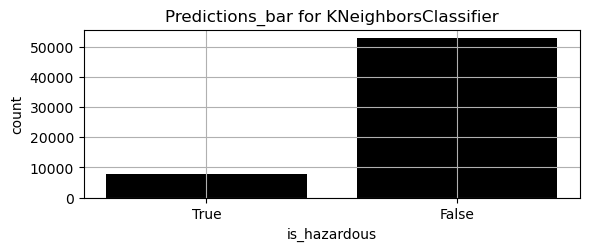

Prediction_true is: 7903
Prediction_false is: 52973 


In [41]:
fahd_fun(pred)
line_plot()
bar_plot()

# Thank You

# Fahd ashraf farouk